## Different Approaches to Multi Objective Optimization

In [28]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import sys

In [29]:
# Global Variables  
r = [0.67627906, 0.7422058,  0.54350261, 0.8023511]
w = [6,6,8,7]
v = [1,2,3,2]
alpha = [1, 2.3, 0.3, 2.3]
beta = [1.5, 1.5, 1.5, 1.5]
C = 400
V = 250
W = 500

In [30]:
# Constraint Handling

def constraint_handling(x, number_of_variables):
    
    global r
    
    g1, g2, g3 =0,0,0
    for j in range(number_of_variables):
        g1 += ((alpha[j]*pow(10,-5))*(-1000/np.log(r[j]))**beta[j])*(x[j] + np.exp(x[j]/4))
        g2 += v[j]*(x[j])**2
        g3 += w[j]*(x[j] + m.exp(x[j]/4))
        
            
    if g1 <= C and g2 <= V and g3 <= W:
        return 1
    else:
        return 0

In [31]:
# Creation of the initial population
def Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound):
    global r
    pseudo_list = []
    rt = np.random.uniform(0.5, 1, size = number_of_variables)
    pseudo_list.append(rt)
    population = np.zeros((population_size, number_of_variables))
    
    z, r_no, = 0,1
    
    if len(r) == 0:
        while True:
            g1, g2, g3 =0,0,0
            z += 1
            x = np.random.randint(variable_lower_bound, variable_upper_bound, size=number_of_variables)
            for j in range(number_of_variables):
                g1 += ((alpha[j]*pow(10,-5))*(-1000/m.log(rt[j]))**beta[j])*(x[j] + m.exp(x[j]/4))
                g2 += v[j]*(x[j])**2
                g3 += w[j]*(x[j] + m.exp(x[j]/4))
            
        
            
            
            if g1 <= C and g2 <= V and g3 <= W:
                r = rt
                print(f"r: {r}")
                break
            elif z > 10000:
                r_no += 1
                print(f"Changing Value of R for {r_no}th time")
                while True:
                    rt = np.random.uniform(0.5, 1, size=number_of_variables)
                    # Check if the array r is in pseudo_list
                    if not any(np.array_equal(r, arr) for arr in pseudo_list):
                        break
                pseudo_list.append(r)
                if r_no > 10000:
                    print("Unable to find a feasible solution after 20000 iterations")
                    exit(0)
                
                z = 0
            # clear_output(wait=True)
            # gc.collect()
            #print(f"Least value of G1 is = {g11}, G2 is = {g22}, G3 is = {g33}")
        
    for i in range(population_size):
        while True:
            x = np.random.randint(variable_lower_bound, variable_upper_bound, size=number_of_variables)
            value = constraint_handling(x, number_of_variables)
            if value == 1:
                break
        
        
        population[i, :] = x


    return population  # [[X1, X2, X3, ..... , Xn]]

In [32]:
# Function calculation of population
def Function_values_2(population):

    values = []
    #print(f"Value of r in Function_values_2: {r}")
    for i,x in enumerate(population):
        f1,f2 = 1,0
        for j in range(len(r)):
            
            f1 *= (1 - (1 - r[j])**x[j])
            f2 += ((alpha[j]*pow(10,-5))*(-1000/m.log(r[j]))**beta[j])*(x[j] + m.exp(x[j]/4))
            
        values.append([f1,f2])
    
    #print(values)

    return values   # [F1, F2]

In [33]:
# Fitness calculation of the Function Values
# Finding the Pareto Optimal solutions

def Non_dominated_sorting_fitness_calculation_2(function_values):
    
    pareto_optimal_fronts = [] # Contains the list of final function values all the fronts
    domination = {} # Contains the index as Key and the dominates Indexes and How many are dominating
                    # {"Index of the Function Value": [["dominating index"], No of solutions dominates by]}
    front = []      # Contains fronts Indexes
    front1 = [] # Contains the Index of the Solutions of the first front
    for i, x in enumerate(function_values):
        sp = []     # Contains the list of Solutions that the current value is Dominating
        np = 0      # Contains the number of solutions that are Dominating the current solution 
        for j, y in enumerate(function_values):
            if x[0] > y[0] and x[1] < y[1]: # Since Maximization Criteria of F1 and Minimization Criteria of F2
                sp.append(j)
            elif x[0] < y[0] and x[1] > y[1]:
                np += 1
        
        domination[i] = [sp, np]
        
        if np == 0:
            front1.append(i)
    front.append(front1)
    
    
    i = 0
    while len(front[i]) > 0:
        temp = []
        for individual in front[i]:
            for other_individual in domination[individual][0]:
                domination[other_individual][1] -= 1
                if domination[other_individual][1] == 0:
                    temp.append(other_individual)
        i += 1
        front.append(temp) # Entering the Values in the Next
    
    for i  in range(len(front)):
        _ = []
        for individual in front[i]:
            _.append(function_values[individual]) # Converting Index Values to Function
        
        pareto_optimal_fronts.append(_)
    
    return pareto_optimal_fronts    # [[[F1, F2], [F1,F2],..]-> Front1, [[F1,F2], [F1,F2],....]-> Front2, ...]

In [34]:
# Function to Create a good Diversity between the solutions

def Crowding_distance_calculation(pareto_optimal_fronts):
    
    max_int = sys.maxsize
    
    distances_values = []
    
    for front in pareto_optimal_fronts: 
                                        # front contains [[F1, F2], [F1, F2], [F1, F2],... ]
        dis = []
        sorted_front = sorted(front, key=lambda l:l[0]) # Sorting the Fronts based in function F1
        
        dis.append(max_int)   # Giving the Extreme point a Maximum Value
        
        if len(sorted_front) > 1:
            for i in range(1, len(sorted_front) - 1):
                
                val = (abs(sorted_front[i+1][0] - sorted_front[i-1][0]))/(max(sorted_front[0]) - min(sorted_front[0]))
                
                dis.append(val)
            
            dis.append(max_int)   # Giving the Extreme point a Maximum Value
            
        
            sorted_front = sorted(front, key=lambda l:l[1]) # Sorting the Fronts based in function F2
                
            dis[0] = max_int
                        
            for i in range(1, len(sorted_front) - 1):
                    
                val = (abs(sorted_front[i+1][1] - sorted_front[i-1][1]))/(max(sorted_front[1]) - min(sorted_front[1]))
                    
                dis[i] += val
                
            dis[len(sorted_front)-1] = max_int
        
        distances_values.append(dis)
        
    return distances_values  # [[D1, D2, D3,..]-> Front1, [D1, D2, D3,...]-> Front2, ...]

Different Selection Operations

In [35]:
# Final Selection after all the calculations
def Binary_Tournament_Selection(function_values, pareto_optimal_fronts, distance_values, population_size, population):
    
    selection_list = [] # ["function_value_index", "pareto_optimal_front_number", "crowding_distance_value"]
    selected_list = []  # ["New_function_value_index", "Population_Values", "Function_Values", "pareto_optimal_front_number", "crowding_distance_value"]
    final_selected_list = [] #["Population Values"] that is the new population after calculation and selection 
    
    for i, x in enumerate(function_values):
        _ = [] # ["Function_value_Index", "Pareto_optimal_Front_Position", "crowding_distance_value"]
        for j, y in enumerate(pareto_optimal_fronts):
            for k, z in enumerate(y):
                if x == z:
                    _.append(i)
                    _.append(j)
                    _.append(distance_values[j][k])

        selection_list.append(_)
        
        #print(selection_list)
    
    
    for i in range(population_size):
        
        random1 = rnd.choice(selection_list)
        random2 = rnd.choice(selection_list)
        
        #print(f"Random1 = {random1}")
        #print(f"Random2 = {random2}")
        
        if random1[0] == random2[0]:
            selected_list.append(random1) # If both are same chose any one
        elif random1[1] < random2[1]:
            selected_list.append(random1)   # If Random1 has better pareto_optimal front
        elif random1[1] > random2[1]:
            selected_list.append(random2)   # If Random2 has better pareto_optimal front
        elif random1[1] == random2[1]:
            if random1[2] > random2[2]:
                selected_list.append(random1)   # If Random1 has greater crowding distance
            else:
                selected_list.append(random2)   # If Random2 has greater crowding distance
    
    #print(selected_list)
    
    for i,x in enumerate(selected_list):
        population_value = population[x[0]]
        final_selected_list.append(population_value) # the final population values that is of X1, x2. ..
        
    
    return final_selected_list # [[X1,X2,..], [X1,X2,..], [X1,X2,..],..]

In [36]:
# Stoachistic Tournament Selection

def Stoachistic_Tournament_Selection(function_values, pareto_optimal_fronts, distance_values, population_size, population, tournament_size=3):
    selection_list = []  # ["function_value_index", "pareto_optimal_front_number", "crowding_distance_value"]
    final_selected_list = []  # ["Population Values"] that is the new population after calculation and selection 

    for i, x in enumerate(function_values):
        entry = []  # ["Function_value_Index", "Pareto_optimal_Front_Position", "crowding_distance_value"]
        for j, y in enumerate(pareto_optimal_fronts):
            for k, z in enumerate(y):
                if x == z:
                    entry.append(i)
                    entry.append(j)
                    entry.append(distance_values[j][k])
        selection_list.append(entry)
    
    for _ in range(population_size):
        # Select k individuals for the tournament
        tournament = rnd.sample(selection_list, tournament_size)
        
        # Sort the tournament individuals based on their pareto front and crowding distance
        tournament.sort(key=lambda x: (x[1], -x[2]))
        
        # Calculate probabilities based on rank
        total_rank = sum(range(1, tournament_size + 1))
        probabilities = [rank / total_rank for rank in range(tournament_size, 0, -1)]
        
        # Select one individual based on the assigned probabilities
        selected_individual = rnd.choices(tournament, probabilities)[0]
        population_value = population[selected_individual[0]]
        
        final_selected_list.append(population_value)  # the final population values that is of X1, x2, ...
    
    return final_selected_list  # [[X1, X2, ..], [X1, X2, ..], [X1, X2, ..], ..]



In [37]:
def Elitism_Selection(function_values, pareto_optimal_fronts, distance_values, population_size, population):
    # Initialize lists for holding selected individuals
    selected_list = []  # ["Function_value_index", "pareto_optimal_front_number", "crowding_distance_value"]
    final_selected_list = []  # ["Population Values"] that is the new population after calculation and selection 

    # Create a list of tuples (function_value_index, pareto_optimal_front_number, crowding_distance_value)
    for i, x in enumerate(function_values):
        _ = [] # ["Function_value_Index", "Pareto_optimal_Front_Position", "crowding_distance_value"]
        for j, y in enumerate(pareto_optimal_fronts):
            for k, z in enumerate(y):
                if x == z:
                    _.append(i)
                    _.append(j)
                    _.append(distance_values[j][k])

        selected_list.append(_)
    # Sort the selected list first by Pareto front number (ascending), then by crowding distance (descending)
    selected_list.sort(key=lambda x: (x[1], -x[2]))

    # # Select the top `population_size` individuals
    for i in range(population_size):
        population_value = population[selected_list[i][0]]
        final_selected_list.append(population_value)  # the final population values that is of X1, x2. ..
        
    
    # Select the top `population_size` individuals
    # for i in range(population_size//2):
    #     population_value = population[selected_list[i][0]]
    #     for j in range(2):
    #         final_selected_list.append(population_value)  # the final population values that is of X1, x2. ..

    return final_selected_list  # [[X1,X2,..], [X1,X2,..], [X1,X2,..],..]


Different Cross-Overs 

In [38]:
# Cross - Over Function

def sbx_Crossover(population, eta_c=10, lows=None, highs=None): # Using SBX cross-over method
    
    offspring = []
    
    for i in range(0,len(population)):
        
        parent1 = population[i]
        
        if i+1 > len(population)-1:
            parent2 = population[0]
        else:
            parent2 = population[i+1]
        
        child1 = np.zeros_like(parent1)
        child2 = np.zeros_like(parent2)
        
        
        for j in range(len(parent1)):
            low = lows[j]
            high = highs[j]
            u = rnd.random()
            if u <= 0.5:
                beta = (2 * u) ** (1 / (eta_c + 1))
            else:
                beta = (1 / (2 * (1 - u))) ** (1 / (eta_c + 1))
            
            child1[j] = 0.5 * (((1 + beta) * parent1[j]) + ((1 - beta) * parent2[j]))
            child2[j] = 0.5 * (((1 - beta) * parent1[j]) + ((1 + beta) * parent2[j]))
            
            child1[j] = max(low, min(child1[j], high))
            child2[j] = max(low, min(child2[j], high))
        
        check = constraint_handling(child1, len(parent1))
        if check != 1:
            child1 = parent1
        
        check = constraint_handling(child2, len(parent2))
        if check != 1:
            child2 = parent2
        
        offspring.append(child1)
        offspring.append(child2)
        
        i += 2
    
    return offspring

In [39]:
# Cross - Over Function

def arithmetic_Crossover(population, alpha=0.5,  lows = None, highs=None): # Using arithmetic_crossover method
    
    offspring = []
    
    for i in range(0,len(population)):
        
        parent1 = population[i]
        
        if i+1 > len(population)-1:
            parent2 = population[0]
        else:
            parent2 = population[i+1]
        
        child1 = alpha * parent1 + (1 - alpha) * parent2
        child2 = alpha * parent2 + (1 - alpha) * parent1
        
        
        check = constraint_handling(child1, len(parent1))
        if check != 1:
            child1 = parent1
        
        check = constraint_handling(child2, len(parent2))
        if check != 1:
            child2 = parent2
        
        offspring.append(child1)
        offspring.append(child2)
        
        i += 2
    
    return offspring

In [40]:
def de_Crossover(population, F=3, CR=6, lows=1, highs=10): # Differential Evolution Cross-Over
    offspring = []
    
    for i in range(len(population)):
        target_idx = i
        
        # Select parents for crossover
        idxs = [idx for idx in range(len(population)) if idx != target_idx]
        selected_indexes = np.random.choice(idxs, 3, replace=False)
        a = population[selected_indexes[0]]
        b = population[selected_indexes[1]]
        c = population[selected_indexes[2]]
        
        # Create mutant
        mutant = a + F * (b - c)
        mutant = np.maximum(mutant, lows)  # Ensure values are at least `lows`
        
        # Apply crossover
        cross_points = np.random.rand(len(mutant)) < CR
        if not np.any(cross_points):
            cross_points[np.random.randint(0, len(mutant))] = True
        trial = np.where(cross_points, mutant, population[target_idx])
        
        # Ensure trial is within bounds and integer values
        if lows is not None and highs is not None:
            trial = np.clip(trial, lows, highs)  # Ensure values are within bounds
        trial = np.round(trial).astype(int)  # Ensure integer values within the range
        
        # Validate the candidate
        check = constraint_handling(trial, len(trial))
        if check != 1:
            child1 = population[target_idx]
        else:
            child1 = trial
        
        offspring.append(child1)
    
    return offspring


In [41]:
def adaptive_crossover(population, generation, max_generations, lows=1, highs=10):
    offspring = []
    
    for i in range(len(population)):
        target_idx = i
        
        # Adaptive parameters based on generation
        F = 0.5 + 0.5 * (1 - generation / max_generations)  # Example adaptation: F decreases over generations
        CR = 0.9 - 0.5 * (generation / max_generations)  # Example adaptation: CR increases over generations
        
        idxs = [idx for idx in range(len(population)) if idx != target_idx]
        selected_indexes = np.random.choice(idxs, 3, replace=False)
        a = population[selected_indexes[0]]
        b = population[selected_indexes[1]]
        c = population[selected_indexes[2]]
        mutant = a + F * (b - c)
        
        # Ensure values are positive
        mutant = np.maximum(mutant, 1)
        
        cross_points = np.random.rand(len(mutant)) < CR
        if not np.any(cross_points):
            cross_points[np.random.randint(0, len(mutant))] = True
        trial = np.where(cross_points, mutant, population[target_idx])
        
        # Ensure values are integers within the range [lows, highs]
        trial = np.round(trial).astype(int)
        trial = np.clip(trial, lows, highs)
        
        check = constraint_handling(trial, len(trial))
        if check != 1:
            child1 = population[target_idx]
        else:
            child1 = trial
        
        offspring.append(child1)
    
    return offspring

In [42]:
def scatter_search_crossover(population, F=0.8, CR=0.7, lows=1, highs=10):
    

    offspring = []
    n = len(population)
    selected_solutions = []
    
    for i in range(n):
        # Select multiple solutions for combining
        selected_indexes = np.random.choice(np.delete(np.arange(n), i), size=5, replace=False)
        for j in selected_indexes:
            selected_solutions.append(population[j])
        
        # Combine selected solutions to create new candidate
        candidate = np.mean(selected_solutions, axis=0)
        
        # Ensure candidate is within bounds and integers
        if lows is not None and highs is not None:
            candidate = np.clip(candidate, lows, highs)
        
        # Introduce mutation and crossover (if necessary)
        target_idx = i
        idxs = [idx for idx in range(n) if idx != target_idx]
        selected_indexes = np.random.choice(idxs, 3, replace=False)
        a = population[selected_indexes[0]]
        b = population[selected_indexes[1]]
        c = population[selected_indexes[2]]
        mutant = a + F * (b - c)
        
        # Ensure mutant values are within bounds
        if lows is not None and highs is not None:
            mutant = np.clip(mutant, lows, highs)
        
        cross_points = np.random.rand(len(mutant)) < CR
        if not np.any(cross_points):
            cross_points[np.random.randint(0, len(mutant))] = True
        trial = np.where(cross_points, mutant, population[target_idx])
        
        # Ensure trial values are within bounds and integers
        if lows is not None and highs is not None:
            trial = np.clip(trial, lows, highs)
        
        trial = np.round(trial).astype(int)  # Ensure integer values within the range
        
        # Validate the candidate
        check = constraint_handling(trial, len(trial))
        if check != 1:
            child1 = population[target_idx]
        else:
            child1 = trial

        offspring.append(child1)
    
    return offspring


In [43]:
# Cross - Over Function

def Uniform_Crossover(population,  lows = None, highs=None): # Using uniform_crossover method
    
    offspring = []
    
    for i in range(0,len(population)):
        
        parent1 = population[i]
        
        if i+1 > len(population)-1:
            parent2 = population[0]
        else:
            parent2 = population[i+1]
        
        mask = np.random.rand(len(parent1)) > 0.5
        
        child1 = np.where(mask, parent1, parent2)
        child2 = np.where(mask, parent2, parent1)
        
        check = constraint_handling(child1, len(parent1))
        if check != 1:
            child1 = parent1
        
        check = constraint_handling(child2, len(parent2))
        if check != 1:
            child2 = parent2
        
        offspring.append(child1)
        offspring.append(child2)
        
        i += 2
    
    return offspring



Different Mutations

In [44]:
# Mutation Function
def polynomial_Mutation(population, pm=0.4, eta_m=20, lows= None, highs=None):  # Polynomial Mutation
    mutated_individual = np.copy(population)
    
    for i in range(len(population)):
        if rnd.random() < pm:
            for j in range(len(lows)):
                low = lows[j] if lows else None
                high = highs[j] if highs else None
                u = rnd.random()
                delta = min(mutated_individual[i][j] - low, high - mutated_individual[i][j])
                delta_q = (2 * u) ** (1 / (eta_m + 1)) - 1 if np.random.random() < 0.5 else 1 - (2 * (1 - u)) ** (1 / (eta_m + 1))
                mutated_individual[i][j] += delta * delta_q
                
                mutated_individual[i][j] = max(low, min(mutated_individual[i][j], high))
        
        check = constraint_handling(mutated_individual[i], len(mutated_individual[i]))
        if check != 1:
            mutated_individual[i] = population[i] # If constraint is violated, revert back to the original individual.
    
    return mutated_individual

In [45]:
# Mutation Function
# def gaussian_Mutation(population, mutation_rate=0.01, sigma=0.1):  # gaussian_mutation
#     mutated_individual = np.copy(population)
    
#     for i in range(len(population)):
#         if np.random.rand() < mutation_rate:
#             mutated_individual[i] += np.random.normal(0, sigma)
            
#         # Round to nearest integer and clip to ensure values are between 1 and 10
#         mutated_individual[i] = np.clip(np.round(mutated_individual[i]), 1, 10)
        
#         check = constraint_handling(mutated_individual[i], len(mutated_individual[i]))
#         if check != 1:
#             mutated_individual[i] = population[i] # If constraint is violated, revert back to the original individual.
    
#     return mutated_individual


def gaussian_Mutation(population, mutation_rate=0.01, sigma=0.1):
    # Convert population to float for mutation
    mutated_individual = np.array(population, dtype=float)
    
    for i in range(len(mutated_individual)):
        if np.random.rand() < mutation_rate:
            mutated_individual[i] += np.random.normal(0, sigma)
        
        # Round to nearest integer and clip to ensure values are between 1 and 10
        mutated_individual[i] = np.clip(np.round(mutated_individual[i]), 1, 10).astype(int)
        
        check = constraint_handling(mutated_individual[i], len(mutated_individual[i]))
        if check != 1:
            mutated_individual[i] = population[i] # If constraint is violated, revert back to the original individual.
    
    return mutated_individual


In [46]:
def de_rand_1_bin_mutation(population, F=0.8, lows=1, highs=10):
    n = len(population)
    D = len(population[0])  # Number of dimensions
    mutated_population = np.copy(population)
    
    for i in range(len(population)):
        
        target_idx = i

        # Select random individuals for mutation
        idxs = [idx for idx in range(n) if idx != target_idx]
        selected_indexes = np.random.choice(idxs, 3, replace=False)
        a = population[selected_indexes[0]]
        b = population[selected_indexes[1]]
        c = population[selected_indexes[2]]

        # Create mutant vector
        mutant = a + F * (b - c)
        
        # Ensure the mutant is within bounds
        mutant = np.clip(mutant, lows, highs)
        
        # Apply binomial crossover
        cross_points = np.random.rand(D) < 0.5  # Binomial crossover rate is set to 0.5
        if not np.any(cross_points):
            cross_points[np.random.randint(0, D)] = True
        trial = np.where(cross_points, mutant, population[target_idx])
        
        # Ensure trial is integer and within bounds
        trial = np.round(trial).astype(int)
        trial = np.clip(trial, lows, highs)
        
        # Validate the candidate
        check = constraint_handling(trial, D)
        if check != 1:
            mutated_population[i] = population[target_idx]  # If constraint is violated, revert back to the original individual.
        else:
            mutated_population[i] = trial
        
    return mutated_population

In [47]:
# Mutation Function
def Uniform_Mutation(population, mutation_rate=0.01, sigma=0.1, lows= None, highs=None):  # uniform_mutation
    mutated_individual = np.copy(population)
    
    for i in range(len(population)):
        if np.random.rand() < mutation_rate:
            mutated_individual[i] = np.random.uniform(lows, highs)
        check = constraint_handling(mutated_individual[i], len(mutated_individual[i]))
        if check != 1:
            mutated_individual[i] = population[i] # If constraint is violated, revert back to the original individual.

    
    return mutated_individual


In [48]:
def adaptive_mutation(population, generation, max_generations, base_mutation_rate=0.01, base_sigma=0.1, lows=1, highs=10):
    mutated_population = np.copy(population)
    
    for i in range(len(population)):
        # Adaptive parameters based on generation
        mutation_rate = base_mutation_rate * (1 - generation / max_generations)
        sigma = base_sigma * (1 - generation / max_generations)
        
        if np.random.rand() < mutation_rate:
            # Apply Gaussian mutation
            mutation = np.random.normal(0, sigma, size=len(population[0]))
            mutated_individual = population[i] + mutation
            
            # Round to nearest integers
            mutated_individual = np.round(mutated_individual)
            
            # Clip to the range [lows, highs]
            mutated_individual = np.clip(mutated_individual, lows, highs)
            
            # Update the mutated population
            mutated_population[i] = mutated_individual
        
        # Ensure the individual is an integer
        mutated_population[i] = np.round(mutated_population[i]).astype(int)
        
        # Constraint handling (if any)
        check = constraint_handling(mutated_population[i], len(mutated_population[i]))
        if check != 1:
            mutated_population[i] = population[i]  # Revert to the original individual if constraints are violated
    
    return mutated_population


In [49]:
# Function to generate the new Generation of better solutions
def New_generations_Binary_Tournament_Selection(Parent_population, Offspring_population):
    
    combination_of_generations = [] # List containing the combination of both parent and child population
    next_generation_values = [] # List containing the values of the next/new generations
    
    
    for i in range(len(Parent_population)):
        combination_of_generations.append(Parent_population[i])
        combination_of_generations.append(Offspring_population[i])
    
    # List containing the function values
    function_values = Function_values_2(combination_of_generations)
    # list containing pareto optimal fronts
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    # List containing the Crowding distance
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    # List containing the final selected values
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                len(combination_of_generations), combination_of_generations)
    
    for i in range(len(Parent_population)):
        next_generation_values.append(final_selected_values[i])
    
    return next_generation_values

In [50]:
# Function to generate the new Generation of better solutions
def New_generations_Stoachistic_Tournament_Selection(Parent_population, Offspring_population):
    
    combination_of_generations = [] # List containing the combination of both parent and child population
    next_generation_values = [] # List containing the values of the next/new generations
    
    
    for i in range(len(Parent_population)):
        combination_of_generations.append(Parent_population[i])
        combination_of_generations.append(Offspring_population[i])
    
    # List containing the function values
    function_values = Function_values_2(combination_of_generations)
    # list containing pareto optimal fronts
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    # List containing the Crowding distance
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    # List containing the final selected values
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                len(combination_of_generations), combination_of_generations)
    
    for i in range(len(Parent_population)):
        next_generation_values.append(final_selected_values[i])
    
    return next_generation_values

In [51]:
# Function to generate the new Generation of better solutions
def New_generations_Elitism_Selection(Parent_population, Offspring_population):
    
    combination_of_generations = [] # List containing the combination of both parent and child population
    next_generation_values = [] # List containing the values of the next/new generations
    
    
    for i in range(len(Parent_population)):
        combination_of_generations.append(Parent_population[i])
        combination_of_generations.append(Offspring_population[i])
    
    # List containing the function values
    function_values = Function_values_2(combination_of_generations)
    # list containing pareto optimal fronts
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    # List containing the Crowding distance
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    # List containing the final selected values
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                len(combination_of_generations), combination_of_generations)
    
    for i in range(len(Parent_population)):
        next_generation_values.append(final_selected_values[i])
    
    return next_generation_values

In [ ]:
#Main Function

# Binary Tournament Selection + SBX Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    ##print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + SBX Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    ##print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + SBX Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    ##print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + SBX Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + SBX Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + SBX Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection +SBX Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection +SBX Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism  Selection +SBX Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection SBX Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection SBX Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection +  SBX Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + SBX Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + SBX Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + SBX Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = sbx_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Arithmetic Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Arithmetic Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Arithmetic Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Arithmetic Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Arithmetic Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Arithmetic Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Arithmetic Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Arithmetic Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Arithmetic Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection +  Arithmetic Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection +  Arithmetic Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection +  Arithmetic Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Arithmetic Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Arithmetic Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Arithmetic Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = arithmetic_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Uniform Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Uniform Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Uniform Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection  + Uniform Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection  + Uniform Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection  + Uniform Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Uniform Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Uniform Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Uniform Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Uniform Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Uniform Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Uniform Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + Uniform Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + Uniform Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + Uniform Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = Uniform_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + de Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + de Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + de Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + de Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + de Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + de Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + de Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + de Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + de Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + de Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + de Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + de Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + de Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + de Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + de Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = de_Crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + adaptive Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + adaptive Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + adaptive Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + adaptive Cross-Over + uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + adaptive Cross-Over + uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + adaptive Cross-Over + uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + adaptive Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + adaptive Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + adaptive Cross-Over + Gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + adaptive Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + adaptive Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = adaptive_mutation(offspring_population,i, 100)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + adaptive Cross-Over + adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + adaptive Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + adaptive Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + adaptive Cross-Over + de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = adaptive_crossover(population, i, 100)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + scatter search Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + scatter search Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + scatter search Cross-Over + Polynomial Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = polynomial_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament selection + scatter search Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament selection + scatter search Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism selection + scatter search Cross-Over + Uniform Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = Uniform_Mutation(offspring_population,  lows=variable_lower_bound, highs=variable_upper_bound)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + scatter search Cross-Over +  gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

Threshold = 800.0
GENERATION :- 1


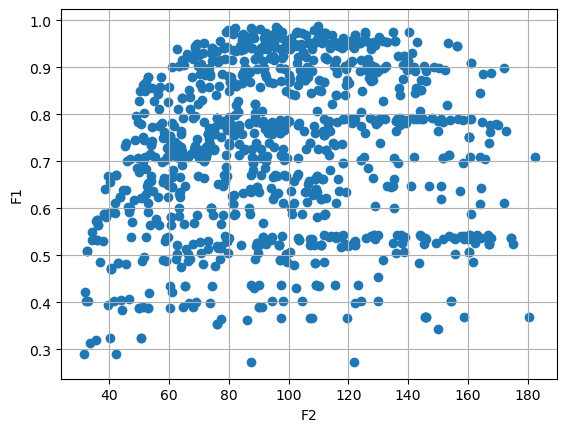

GENERATION :- 2


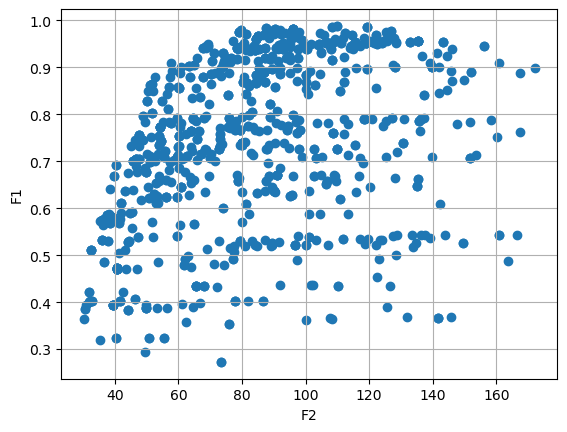

GENERATION :- 3


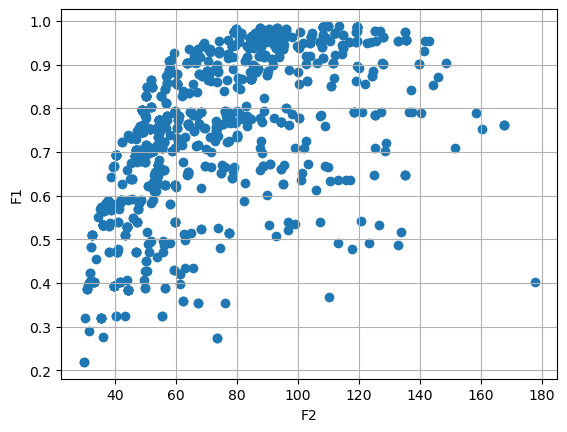

GENERATION :- 4


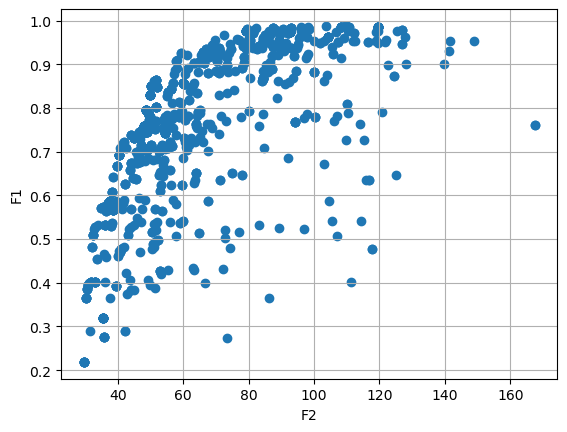

GENERATION :- 5


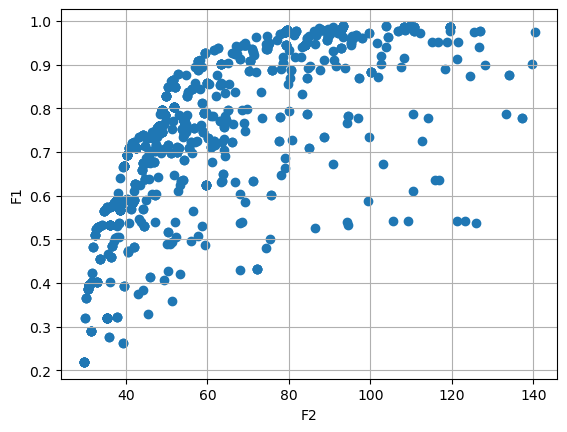

GENERATION :- 6


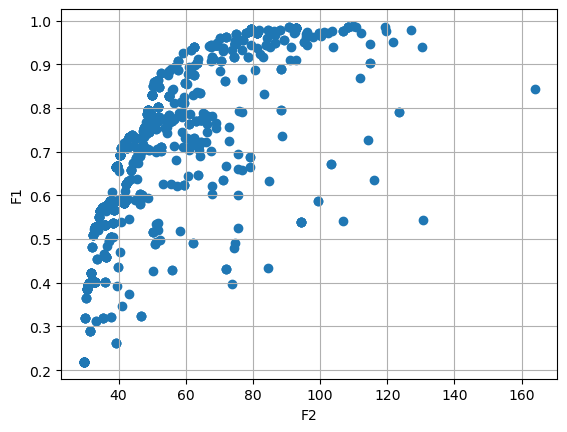

GENERATION :- 7


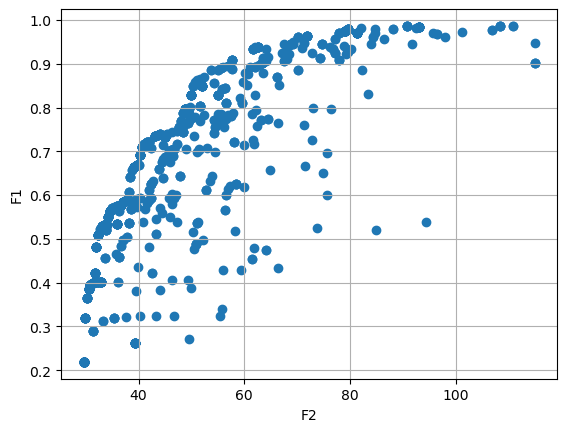

GENERATION :- 8


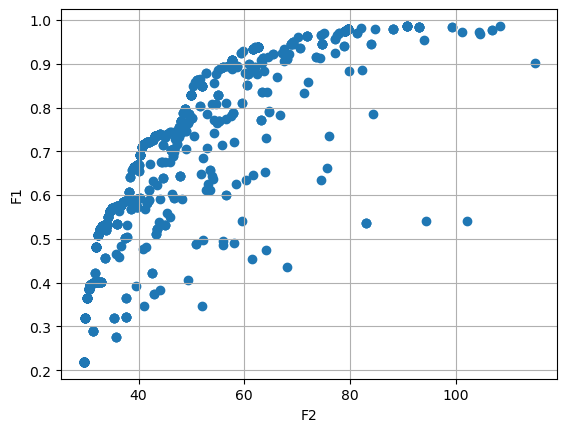

GENERATION :- 9


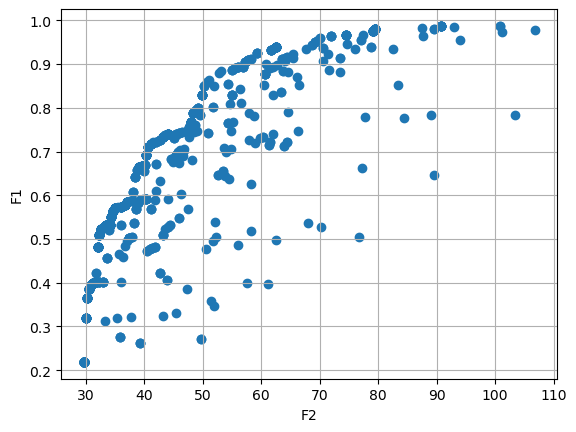

GENERATION :- 10


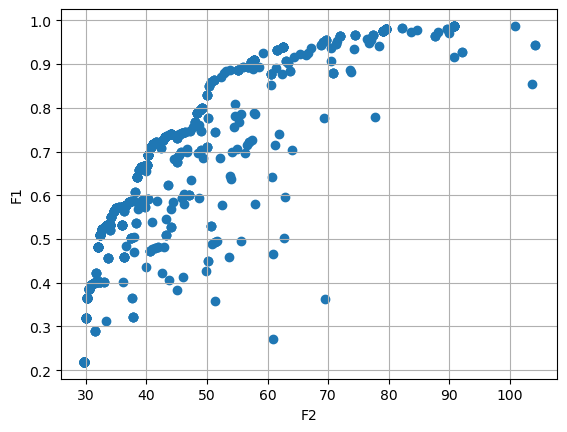

GENERATION :- 11


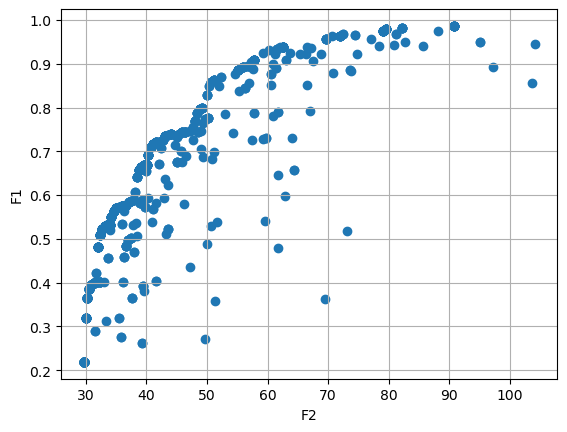

GENERATION :- 12


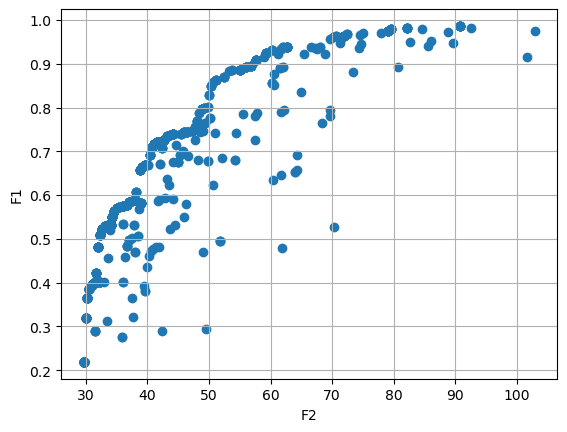

GENERATION :- 13


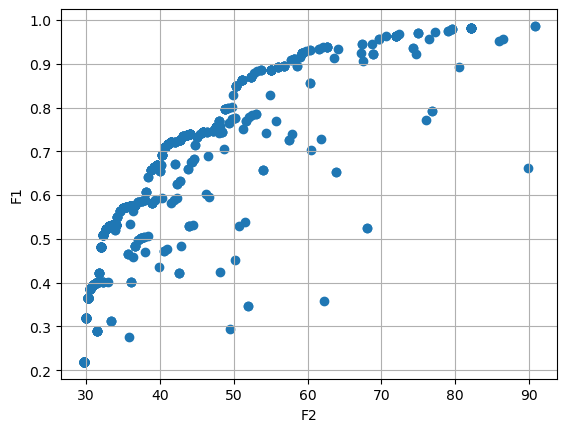

GENERATION :- 14


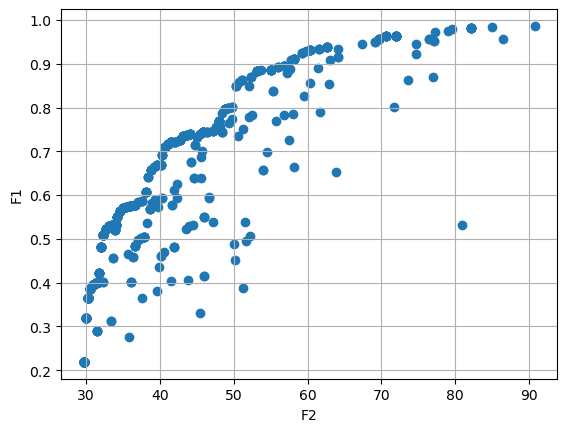

GENERATION :- 15


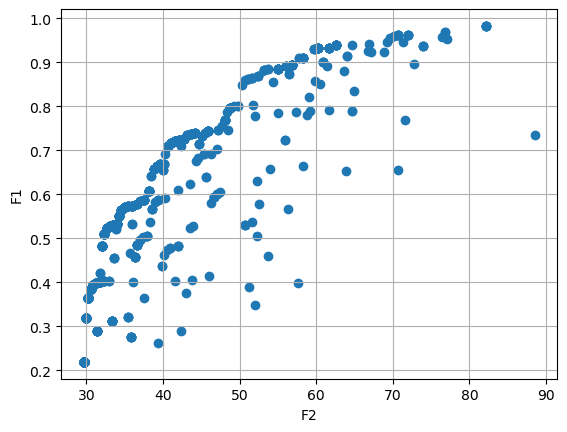

GENERATION :- 16


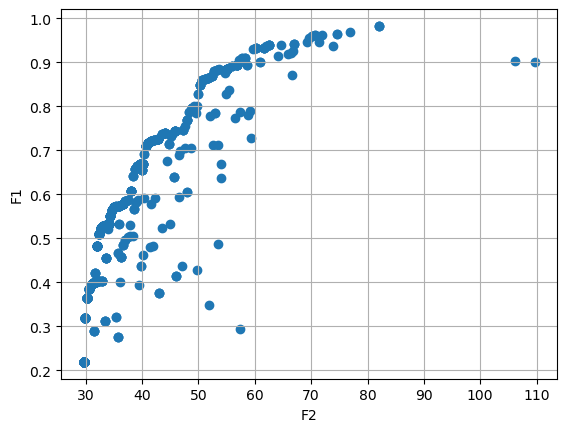

GENERATION :- 17


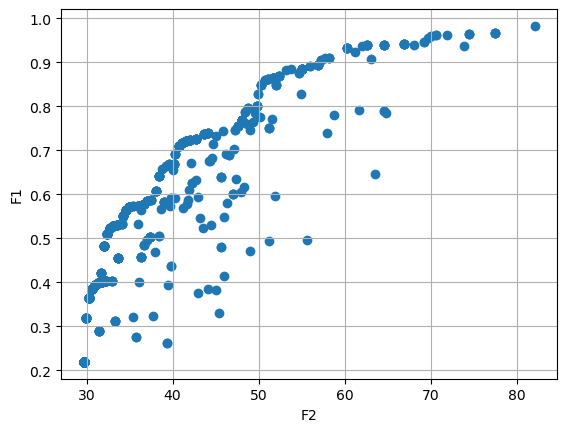

GENERATION :- 18


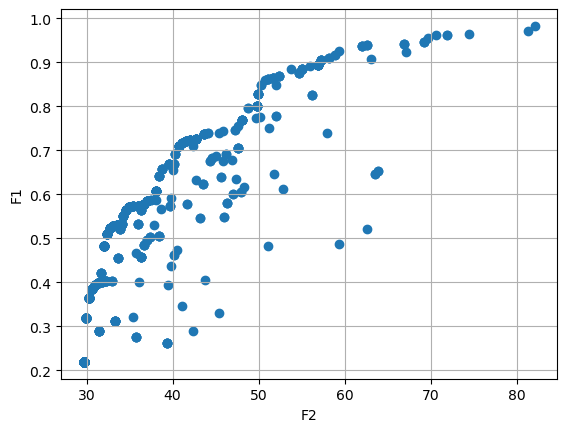

GENERATION :- 19


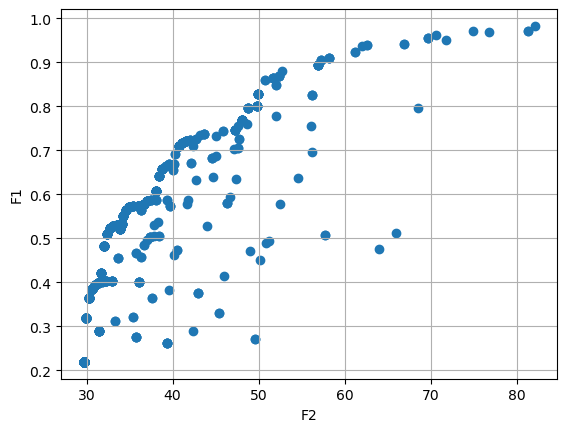

GENERATION :- 20


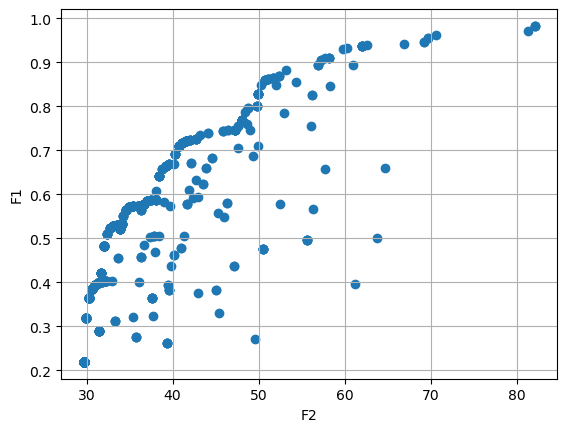

GENERATION :- 21


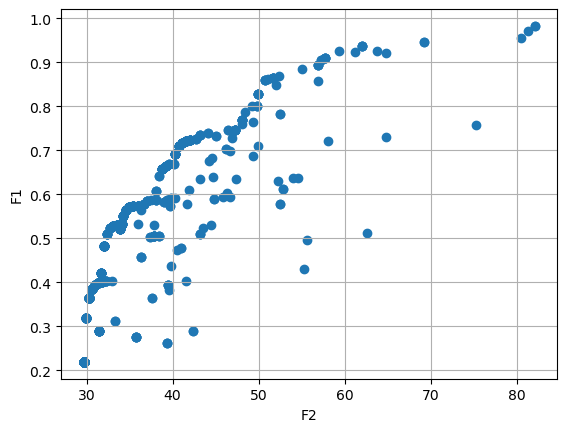

GENERATION :- 22


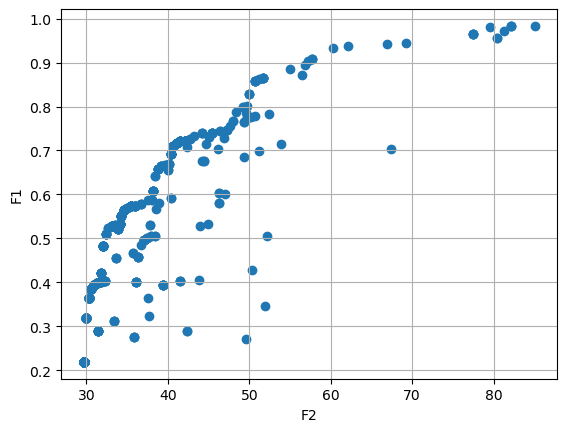

GENERATION :- 23


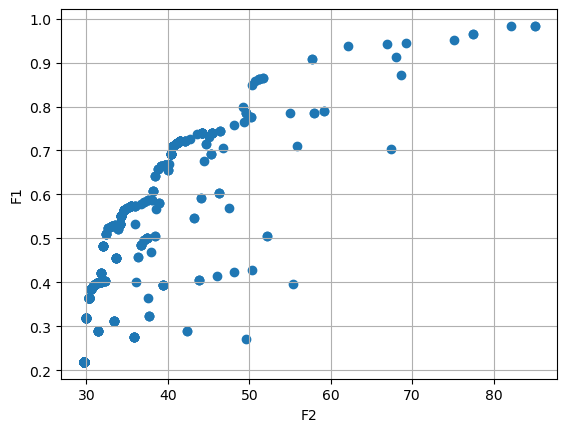

GENERATION :- 24


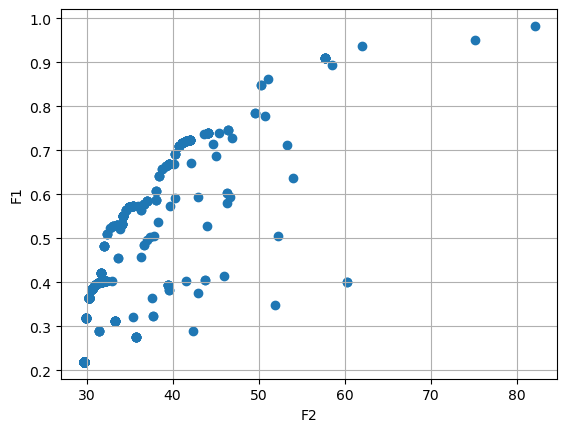

GENERATION :- 25


KeyboardInterrupt: 

In [159]:
#Main Function

# Stoachistic Tournament Selection + scatter search Cross-Over +  gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + scatter search Cross-Over +  gaussian Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = gaussian_Mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + scatter search Cross-Over +  de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + scatter search Cross-Over +  de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + scatter search Cross-Over +  de_rand_1_bin Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = de_rand_1_bin_mutation(offspring_population)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Binary Tournament Selection + scatter search Cross-Over +  adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Binary_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population, i, 100)
    population = New_generations_Binary_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Stoachistic Tournament Selection + scatter search Cross-Over +  adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Stoachistic_Tournament_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population,i,100)
    population = New_generations_Stoachistic_Tournament_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()

In [ ]:
#Main Function

# Elitism Selection + scatter search Cross-Over +  adaptive Mutation

population_size = 1000
number_of_variables = 4
variable_upper_bound = [] 
variable_lower_bound = []
for i in range(number_of_variables):
    variable_upper_bound.append(10)
    variable_lower_bound.append(1)
    
# print(variable_lower_bound)
# print(variable_upper_bound)

threshold = population_size*0.8

print(f'Threshold = {threshold}')

population = Generate_population_2(population_size, number_of_variables, variable_upper_bound, variable_lower_bound)

for i in range(100):
    print(f"GENERATION :- {i+1}")
    counter = 0
    first_counter = 0
    function_values = Function_values_2(population)
    #print(function_values)
    
    first_value = function_values[0] # Get the first element of the first sublist
    first_f1_point = first_value[0]
    
    for sublist in function_values:
        if sublist == first_value:
                first_counter += 1
        for value in sublist:
            if value == first_f1_point:
                counter += 1 # Found different value
    
    if counter >= threshold or first_counter >= threshold:
        print(f"Convergence reached after {i+1} generations as there are {threshold} same values")
        break
    
    pareto_optimal_front_values = Non_dominated_sorting_fitness_calculation_2(function_values)
    #print(pareto_optimal_front_values)
    crowding_distance_calculation_values = Crowding_distance_calculation(pareto_optimal_front_values)
    #print(crowding_distance_calculation_values)
    final_selected_values = Elitism_Selection(function_values, pareto_optimal_front_values, crowding_distance_calculation_values, 
                                                population_size, population)
    population = final_selected_values
    offspring_population = scatter_search_crossover(population, lows=variable_lower_bound, highs=variable_upper_bound)
    offspring_population = adaptive_mutation(offspring_population,i,100)
    population = New_generations_Elitism_Selection(population, offspring_population)
    #print(population)
    x = []
    y = []
    for i in function_values:
        x.append(i[0])
        y.append(i[1])
    #plt.figure(figsize=(8, 6))
    #plt.xlim(50, 300)  # Limit x-axis from 0 to 6
    #plt.ylim(0.9, 0.99)  # Limit y-axis from 0 to 6

    plt.scatter(y,x)
    plt.ylabel("F1")
    plt.xlabel("F2")
    plt.grid()
    plt.show()